<a href="https://colab.research.google.com/github/GitableGabe/DATA_620_Collab/blob/main/Week3_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week Three - Part 2 - Data Science Team (Heleine, Gabriel, Kossi and Victor)

# Instructions:

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

You may work in a small group on this project.


# Introduction

The analysis analysis uses the Davis Southern Women dataset, which is a small bipartite network dataset from a 1941 study. This dataset records the attendance of 18 Southern women at 14 social events. We'll use NetworkX to create the dataset, reduce the network using the island method, and analyze the relationships between the women and the social events.

# Our code:

# 1. Create and visualize the Davis Southern Women Bipartite Graph

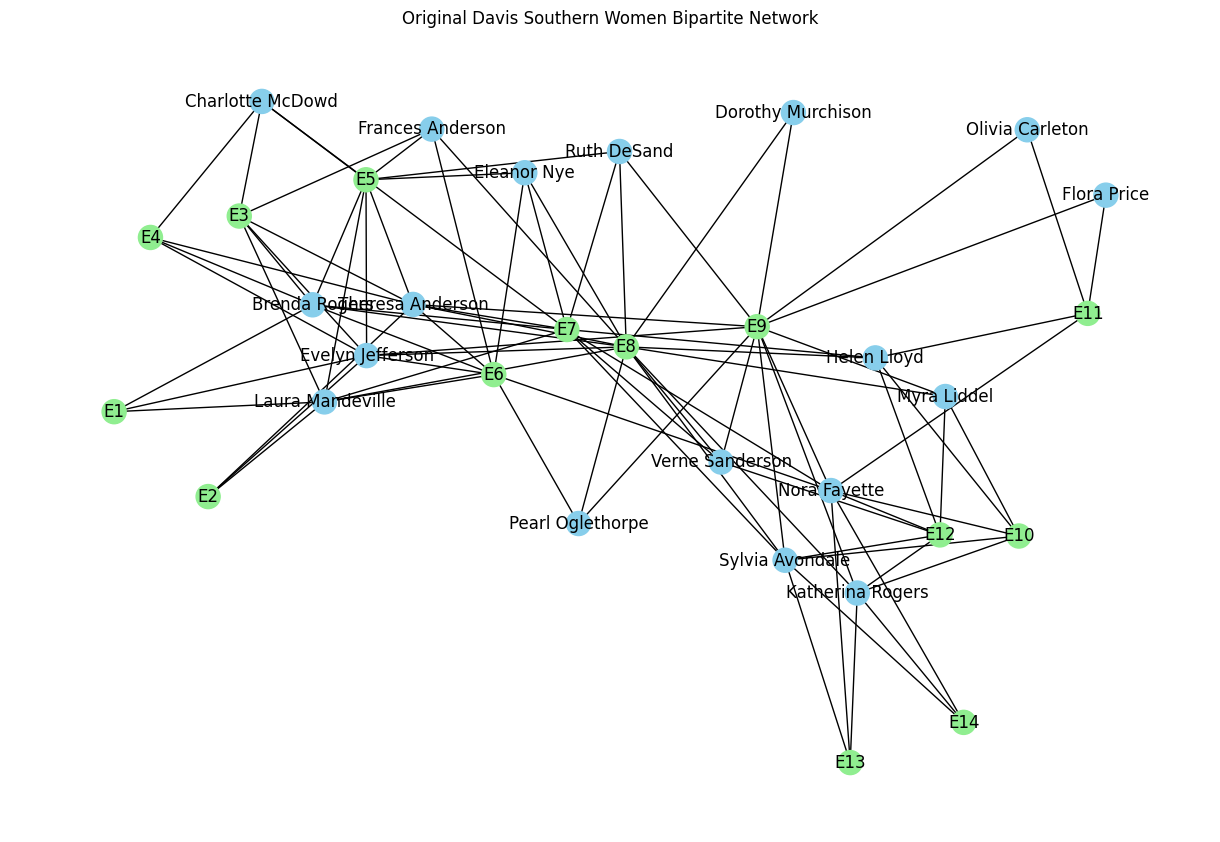

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the Davis Southern Women bipartite graph
B = nx.davis_southern_women_graph()

# Visualize the original bipartite graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(B, seed=42)
node_colors = ["skyblue" if B.nodes[n]['bipartite'] == 0 else "lightgreen" for n in B.nodes()]
nx.draw(B, pos, with_labels=True, node_color=node_colors)
plt.title("Original Davis Southern Women Bipartite Network")
plt.show()



# 2. Apply the island method to reduce the network size




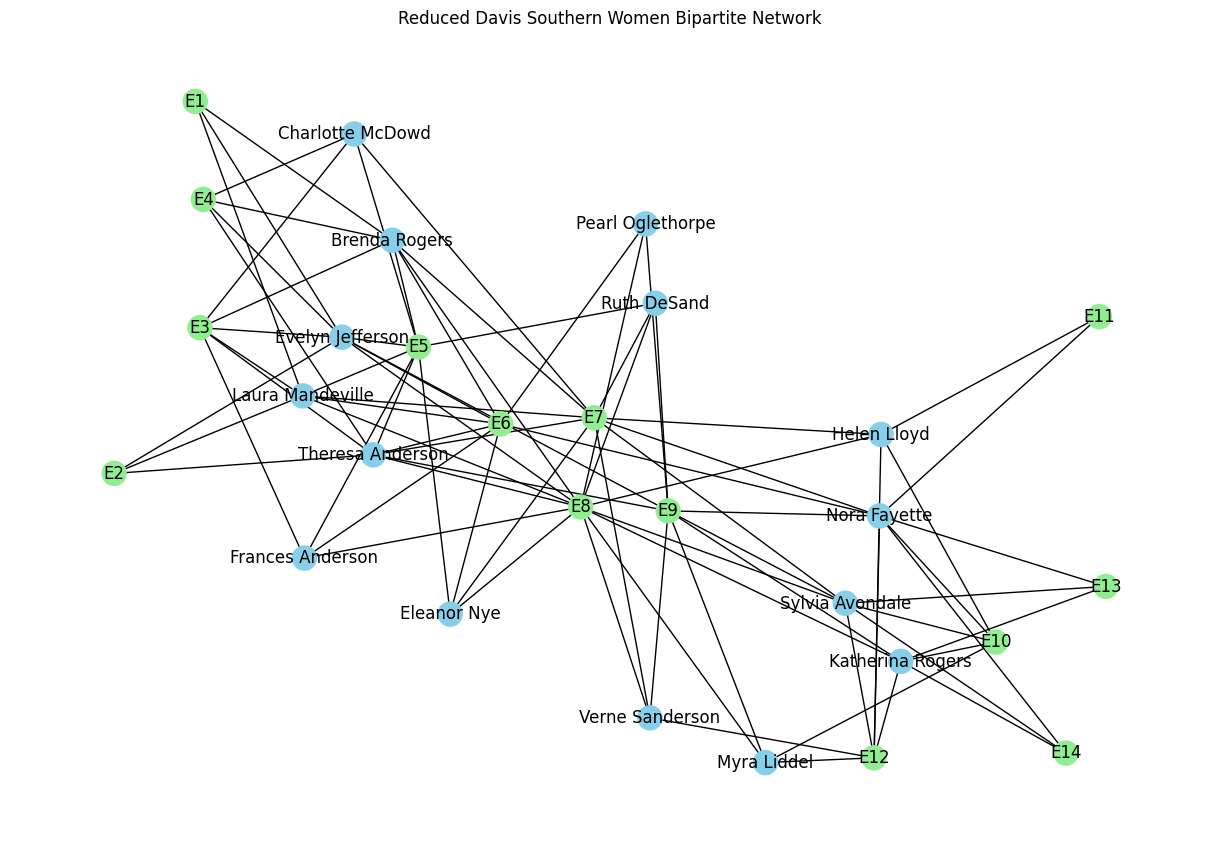

In [5]:
def island_method(G, threshold):
    G_reduced = nx.Graph()
    for node in G.nodes():
        if G.degree(node) >= threshold:
            G_reduced.add_node(node, bipartite=G.nodes[node]['bipartite']) # Copy the 'bipartite' attribute
            for neighbor in G.neighbors(node):
                if G.degree(neighbor) >= threshold:
                    G_reduced.add_edge(node, neighbor)
                    G_reduced.add_node(neighbor, bipartite=G.nodes[neighbor]['bipartite']) # Copy the 'bipartite' attribute for neighbors
    return G_reduced

# Define a threshold for the island method
threshold = 3

# Reduce the network size
B_reduced = island_method(B, threshold)

# Visualize the reduced bipartite graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(B_reduced, seed=42)
node_colors = ["skyblue" if B_reduced.nodes[n]['bipartite'] == 0 else "lightgreen" for n in B_reduced.nodes()]
nx.draw(B_reduced, pos, with_labels=True, node_color=node_colors)
plt.title("Reduced Davis Southern Women Bipartite Network")
plt.show()

# 3. Infer characteristics about the distinct groups

In [6]:
# Infer characteristics about the distinct groups
women_reduced = [node for node in B_reduced.nodes() if B_reduced.nodes[node]['bipartite'] == 0]
events_reduced = [node for node in B_reduced.nodes() if B_reduced.nodes[node]['bipartite'] == 1]

print("Women in the reduced network:", women_reduced)
print("Social events in the reduced network:", events_reduced)


Women in the reduced network: ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd']
Social events in the reduced network: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9', 'E7', 'E12', 'E10', 'E13', 'E14', 'E11']


# 4. Analyzing relationships in the reduced network

In [7]:

degree_centrality = nx.degree_centrality(B_reduced)

# Display degree centrality for women and events
women_centrality = {node: degree for node, degree in degree_centrality.items() if node in women_reduced}
events_centrality = {node: degree for node, degree in degree_centrality.items() if node in events_reduced}

print("\nDegree Centrality of Women in the Reduced Network:")
for woman, centrality in sorted(women_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"{woman}: {centrality:.2f}")

print("\nDegree Centrality of Social Events in the Reduced Network:")
for event, centrality in sorted(events_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"{event}: {centrality:.2f}")


Degree Centrality of Women in the Reduced Network:
Evelyn Jefferson: 0.29
Theresa Anderson: 0.29
Nora Fayette: 0.29
Laura Mandeville: 0.25
Brenda Rogers: 0.25
Sylvia Avondale: 0.25
Katherina Rogers: 0.21
Helen Lloyd: 0.18
Charlotte McDowd: 0.14
Frances Anderson: 0.14
Eleanor Nye: 0.14
Ruth DeSand: 0.14
Verne Sanderson: 0.14
Myra Liddel: 0.14
Pearl Oglethorpe: 0.11

Degree Centrality of Social Events in the Reduced Network:
E8: 0.46
E7: 0.36
E9: 0.32
E5: 0.29
E6: 0.29
E3: 0.21
E12: 0.21
E10: 0.18
E4: 0.14
E1: 0.11
E2: 0.11
E13: 0.11
E14: 0.11
E11: 0.07


# 5. Our conclusion on the Analysis:

By applying the island method and analyzing the degree centrality, we can infer that certain women and events are more central to the network. This suggests their importance in the social structure of the community, with central women being key social connectors and central events being pivotal gatherings.

The above conclusion is based on the three criteria below.
In terms of women:
- Reduce Network Women:
The women who remain in the reduced network are those who attended more social events, indicating their higher social engagement.
- Degree Centrality: Women with higher degree centrality are those who attended many of the important social events, suggesting their central role

In terms of social events in the social fabric.

- Reduced Network Events: The social events that remain in the reduced network are those that were attended by more women, indicating their popularity and significance in the community.
-Degree Centrality: Events with higher degree centrality are those that attracted many attendees, suggesting their importance and possibly more influential or prestigious nature.